#### Example 4. Framingham Chance of CHD (submitted)

1. Data preparation

In [217]:
import pandas as pd

# read data from file
df = pd.read_csv('D:\\python\\pyforml\\week03_logistic-regression\\homework\\framingham.csv')
print(df.shape)
df.head()

(4238, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [218]:
# check for null values
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [219]:
# remove null values
df = df.dropna(how='any', axis=0)
df.shape

(3656, 16)

In [220]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [221]:
# split data into training-validation set with ratio 7:3
train = df.sample(frac=0.7, random_state=17)
test = df.drop(train.index)

print(train.shape)
print(test.shape)

(2559, 16)
(1097, 16)


In [222]:
X_train = train.iloc[:, :-1]
Y_train = train.iloc[:, -1]

X_test = test.iloc[:, :-1]
Y_test = test.iloc[:, -1]

print(X_train.shape)
print(Y_train.shape)

(2559, 15)
(2559,)


2. Classification using Perceptron

In [223]:
from sklearn.linear_model import Perceptron

# define model
pct = Perceptron(fit_intercept=True, random_state=17)
# fit model
pct.fit(X_train, Y_train)

Perceptron(random_state=17)

In [224]:
# print out the coefficients
pct.coef_

array([[  246.  ,  1086.  ,  -711.  ,   -78.  ,   432.  ,    45.  ,
           31.  ,   425.  ,    87.  ,   -14.  ,  1018.  , -1104.5 ,
        -1285.52,  -959.  ,   -98.  ]])

In [225]:
# predict on test set
Y_pred = pct.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [226]:
# evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

print('Accuracy score:', accuracy)
print('Precision score:', precision)
print('Recall score:', recall)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

Accuracy score: 0.7629899726526892
Precision score: 0.2869198312236287
Recall score: 0.4276729559748428
[[769 169]
 [ 91  68]]


3. Classification using Logistic Regression

In [227]:
print(X_train.shape)
print(Y_train.shape)

(2559, 15)
(2559,)


In [228]:
from sklearn.linear_model import LogisticRegression

lorg = LogisticRegression(random_state=40)
# train model by training set
lorg.fit(X_train, Y_train)
lorg.coef_


c:\Users\Admin\Python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 0.12468095,  0.02628482, -0.32235616, -0.04540403,  0.01771367,
         0.01999055,  0.01454621,  0.2210835 ,  0.04645647, -0.00178591,
         0.02244753, -0.02488984, -0.05727288, -0.02594619,  0.0041338 ]])

In [229]:
lorg.intercept_

array([-0.10085971])

In [230]:
# make prediction on test set
Y_pred = lorg.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [231]:
# evaluate
print('Accuracy score:', accuracy_score(Y_test,Y_pred))
print('Precision score:', precision_score(Y_test, Y_pred))
print('Recall score:', recall_score(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

Accuracy score: 0.853236098450319
Precision score: 0.4166666666666667
Recall score: 0.031446540880503145
[[931   7]
 [154   5]]


1. giải thích kết quả thu được
    - 2 mô hình trả về bộ hệ số khác nhau do khác biệt về hàm kích hoạt (perceptron sử dụng hàm dấu (sign), logistic regression sử dụng hàm sigmoid)

2. nhận xét độ chính xác
    2.1 Perceptron: 
    - accuracy = 0.76, precision = 0.29, recall = 0.43
        -> dự đoán chưa chính xác đối với dữ liệu mới
    - khi thay thế random.seed thì trả về kết quả khác nhau 
        -> độ chính xác của mô hình phụ thuộc vào bộ tham số khởi tạo ban đầu
        -> sẽ cần điều chỉnh các tham số learning rate eta, số vòng lặp để cải thiện độ chính xác 

    2.2. Logistic Regression:
    - accuracy = 0.86, precision = 0.5, recall = 0.05
        -> recall thấp, bỏ sót nhiều trường hợp chẩn đoán người có khả năng bị bệnh 

#### Example 2. Sonar Signals

In [232]:
'''
prob: discriminate between sonar signals bounced off a metal cylinder 
        and those bounced off a roughly cylindrical rock
input: 59 features
output: 1 of 2 classes (R = Rock, M = Mine)
method: perceptron
'''

'\nprob: discriminate between sonar signals bounced off a metal cylinder \n        and those bounced off a roughly cylindrical rock\ninput: 59 features\noutput: 1 of 2 classes (R = Rock, M = Mine)\nmethod: perceptron\n'

1. Read and prepare data

In [233]:
# read data from file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

main_df = pd.read_csv('sonar.all-data.csv', header=None)
main_df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


<Axes: ylabel='60'>

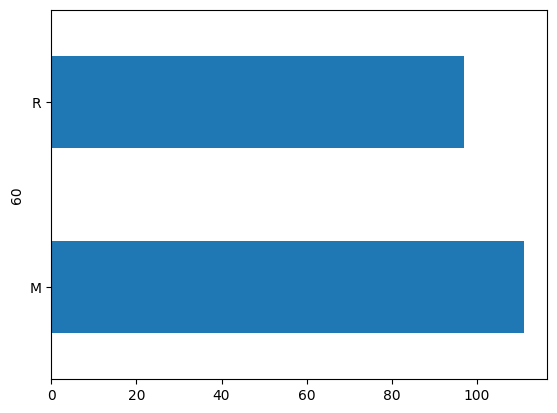

In [234]:
# check the data balance
main_df[60].value_counts().plot(kind='barh')

In [235]:
# convert output from string {'M', 'R'} into  {1, -1}
y_df = main_df[60]
targets_label = {'M': 1, 'R': -1}
targets_df = [targets_label[item] for item in y_df]
print(targets_df)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [348]:
# prepare data
input_df = main_df.drop(60, axis=1)
x0 = np.ones((input_df.shape[0], 1))
X = np.concatenate((x0, input_df), axis = 1)

In [349]:
# split data into training-test set
from sklearn.model_selection import train_test_split

targets_df = np.asarray(targets_df).reshape(len(targets_df), 1)
X_train, X_test, y_train, y_test = train_test_split(X, targets_df, test_size=0.30, random_state=42)

print(X_train.shape)
print(X_test.shape)

(145, 61)
(63, 61)


2. Classification using Perceptron

In [238]:
# define h_w(x):= W^T.x + w_0 = Wbar^T . Xbar
def h(w, x):
    return np.sign(np.dot(w.T, x))

# define stop condition
def has_converged(X, y, w):
    return np.array_equal(h(w, X), y)

In [239]:
# solve using Stochastic Gradient Descent
def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    d = X.shape[0]
    mis_points = [] # store set of miss placed points
    
    while True:
        # mix data
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(d, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi
                w.append(w_new)
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

In [240]:
# compute the weights w
d = X_train.shape[1]
w_init = np.random.randn(d, 1)
w, m = perceptron(X_train.T, y_train.T, w_init)
print(w[-1])

[[ -40.42107831]
 [ 151.00937616]
 [ -46.66874637]
 [-155.00769549]
 [ 153.08274365]
 [  40.98352148]
 [  32.35454174]
 [ -68.76626959]
 [ -27.5974602 ]
 [  51.90640558]
 [ -53.84375045]
 [  85.08460684]
 [  13.94132432]
 [  -4.1606461 ]
 [  -8.74137201]
 [  11.78823016]
 [ -29.98896038]
 [ -33.3374957 ]
 [  42.38065682]
 [ -18.90428688]
 [  54.88827579]
 [ -77.29444817]
 [  76.58295792]
 [ -55.58395438]
 [  66.29398834]
 [  -8.46744406]
 [ -13.59985628]
 [  -1.85191597]
 [  17.27382507]
 [ -27.93966794]
 [  73.35557382]
 [-103.34444255]
 [  32.4609218 ]
 [  43.45222354]
 [ -50.77706932]
 [  37.57902438]
 [ -69.13151027]
 [  17.17652428]
 [ -11.43625934]
 [  53.84690706]
 [ -53.49201501]
 [  -8.73076222]
 [ -25.23502336]
 [  62.6262686 ]
 [  -1.58258138]
 [  -7.33843349]
 [  54.84362102]
 [ -46.8511358 ]
 [ 145.70353137]
 [ 149.90794961]
 [-208.41636211]
 [  98.38591517]
 [  66.80500462]
 [  22.6834644 ]
 [ 119.83354215]
 [  -5.62951248]
 [ -65.16977876]
 [ -89.08357872]
 [  47.0517195

In [241]:
# predict on test set
w = w[-1]
y_pred = h(w, X_test.T)
y_pred

array([[ 1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,
         1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,
        -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
        -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,
        -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.]])

In [242]:
# evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_test = y_test.T[0]
y_pred = y_pred[0]
print('accuracy =', accuracy_score(y_test, y_pred))
print('precision =', precision_score(y_test, y_pred))
print('recall =', recall_score(y_test, y_pred))

accuracy = 0.7777777777777778
precision = 0.7837837837837838
recall = 0.8285714285714286


3. Visualize 2D

In [336]:
# PCA for dimensionality reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaled_X = StandardScaler().fit_transform(input_df)
pca = PCA(n_components=2)
transformed_X = pca.fit_transform(scaled_X)


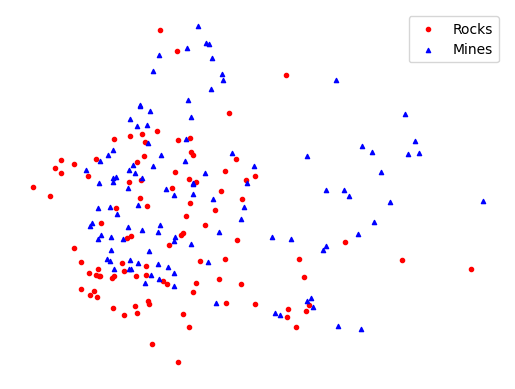

In [343]:
# visualize
Y = y_df.replace({'M': 1, 'R': -1})
plt.axis("off")
plt.scatter(transformed_X[Y==-1][:, 0], transformed_X[Y==-1][:, 1], s=9, label='Rocks',
c='red')
plt.scatter(transformed_X[Y==1][:, 0], transformed_X[Y==1][:, 1], s=9, label='Mines',
c='blue', marker="^")
plt.legend()
plt.show()

4. Classification using Logistic Regression

In [350]:
print(X_train.shape)
print(y_train.shape)

(145, 61)
(145, 1)


In [351]:
from sklearn.linear_model import LogisticRegression

lorg = LogisticRegression(random_state=40, fit_intercept=False)
# train model by training set
lorg.fit(X_train, y_train.T[0])
lorg.coef_

array([[-8.88124917e-01,  2.06829020e-01,  1.29645411e-01,
         7.27155798e-02,  4.48774977e-01,  4.17537279e-01,
         1.65675339e-02, -1.89638004e-01,  5.12834106e-04,
         7.66073847e-01,  7.81204962e-01,  1.39806490e+00,
         1.32796741e+00,  4.67904013e-01, -3.45956468e-01,
        -3.88845198e-01, -5.59886064e-01, -1.88578844e-01,
        -3.11779512e-01,  1.59086541e-01,  3.85290966e-01,
         4.78917924e-01,  4.82871424e-01,  2.00122358e-01,
         1.35053714e-01, -2.57425941e-01, -3.60444213e-01,
        -1.73117437e-01,  3.58163636e-01,  1.76390567e-01,
         3.00767452e-01, -8.79168110e-01, -4.55229441e-02,
         9.77674281e-02, -2.84896448e-01, -6.07961379e-01,
        -1.11912272e+00, -8.47590426e-01,  4.10494510e-02,
         1.56955264e-01, -5.95539501e-01, -5.58286138e-02,
         6.44613846e-01,  9.80338847e-01,  9.16684986e-01,
         1.18517621e+00,  1.05190171e+00,  4.72948155e-01,
         4.19502403e-01,  3.30407256e-01,  2.27202072e-0

In [353]:
y_pred = lorg.predict(X_test)
y_pred

array([ 1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,
        1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1])

In [354]:
print('accuracy =', accuracy_score(y_test, y_pred))
print('precision =', precision_score(y_test, y_pred))
print('recall =', recall_score(y_test, y_pred))

accuracy = 0.8253968253968254
precision = 0.8
recall = 0.9142857142857143


Kết quả cho thấy độ chính xác của mô hình Logistic Regression cao hơn so với mô hình sử dụng Perceptron

#### Example 3. Breast Cancer

In [249]:
# load dataset
from sklearn import datasets

cancer_data = datasets.load_breast_cancer()
# display record 5th for checking
print(cancer_data.data[5])
print(cancer_data.data.shape)
#target set
print(cancer_data.target)

[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 

In [355]:
x0 = np.ones((cancer_data.data.shape[0], 1))
X = np.concatenate((x0, cancer_data.data), axis = 1)
X

array([[ 1.     , 17.99   , 10.38   , ...,  0.2654 ,  0.4601 ,  0.1189 ],
       [ 1.     , 20.57   , 17.77   , ...,  0.186  ,  0.275  ,  0.08902],
       [ 1.     , 19.69   , 21.25   , ...,  0.243  ,  0.3613 ,  0.08758],
       ...,
       [ 1.     , 16.6    , 28.08   , ...,  0.1418 ,  0.2218 ,  0.0782 ],
       [ 1.     , 20.6    , 29.33   , ...,  0.265  ,  0.4087 ,  0.124  ],
       [ 1.     ,  7.76   , 24.54   , ...,  0.     ,  0.2871 ,  0.07039]])

In [356]:
# split data into training-test set
X_train, X_test, y_train, y_test = train_test_split(X, cancer_data.target, test_size=0.3,random_state=109)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(398, 31)
(398,)
(171, 31)
(171,)


1. Classification using Perceptron

In [269]:
# define h_w(x):= W^T.x + w_0 = Wbar^T . Xbar
def h(w, x):
    return np.sign(np.dot(w.T, x))

# solve using Stochastic Gradient Descent
def perceptron(X, y, w_init, tol = 1e-4, max_count = 100000):
    w = [w_init]
    N = X.shape[1]
    d = X.shape[0]
    mis_points = [] # store set of miss placed points
    count = 0
    check_w_after = 20

    while count < max_count:
        # mix data
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(d, 1)
            yi = y[mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi
                w.append(w_new)
                count += 1
            if count%check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    break
    return (w, mis_points)

In [270]:
# compute the weights w
d = X_train.shape[1]
w_init = np.random.randn(d, 1)
w, m = perceptron(X_train.T, y_train.T, w_init)
print(w[-1])

[[-0.06972855]
 [-0.00617239]
 [-1.54806033]
 [ 0.20420259]
 [ 1.87867383]
 [-0.57796801]
 [-0.51812147]
 [ 0.99721037]
 [-1.34532436]
 [-1.67065188]
 [-0.34937726]
 [-0.22640491]
 [-0.29029845]
 [-0.2492787 ]
 [ 0.54770254]
 [ 0.99019758]
 [-0.91589396]
 [-0.43574327]
 [ 1.00491085]
 [-0.09253612]
 [-0.85748993]
 [-0.10094276]
 [ 0.78604234]
 [-2.563765  ]
 [-0.02183692]
 [-0.72324973]
 [ 0.37658804]
 [-0.1765599 ]
 [-0.27587485]
 [ 0.84454901]
 [ 0.9723407 ]]


In [271]:
# predict on test set
w = w[-1]
y_pred = h(w, X_test.T)
y_pred

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [277]:
print('accuracy =', accuracy_score(y_test, y_pred[0]))
print('precision =', precision_score(y_test, y_pred[0]))
print('recall =', recall_score(y_test, y_pred[0]))
cm = confusion_matrix(y_test, y_pred[0])
print(cm)

accuracy = 0.631578947368421
precision = 0.631578947368421
recall = 1.0
[[  0  63]
 [  0 108]]


In [280]:
from sklearn.linear_model import Perceptron

# define model
pct = Perceptron(fit_intercept=False, random_state=17)
# fit model
pct.fit(X_train, y_train)

Perceptron(fit_intercept=False, random_state=17)

In [283]:
pct.coef_

array([[ 2.85000000e+02,  2.16777400e+03,  2.98050000e+03,
         1.25544900e+04,  4.80500000e+03,  2.00928600e+01,
        -1.01732800e+01, -3.99147299e+01, -1.76438890e+01,
         3.74262000e+01,  1.58051400e+01,  7.90790000e+00,
         1.96661700e+02, -7.46966000e+01, -6.13406800e+03,
         1.13709400e+00, -3.48870600e+00, -5.08165590e+00,
        -7.70819000e-01,  3.24254500e+00,  1.50458800e-01,
         2.29302700e+03,  3.62823000e+03,  1.27208400e+04,
        -6.59890000e+03,  2.49458300e+01, -4.76043900e+01,
        -8.72288600e+01, -2.23374040e+01,  4.83396000e+01,
         1.38218800e+01]])

In [281]:
# predict on test set
Y_pred = pct.predict(X_test)
Y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [282]:
print('accuracy =', accuracy_score(y_test, Y_pred))
print('precision =', precision_score(y_test, Y_pred))
print('recall =', recall_score(y_test, Y_pred))
cm = confusion_matrix(y_test, Y_pred)
print(cm)

accuracy = 0.9415204678362573
precision = 0.9298245614035088
recall = 0.9814814814814815
[[ 55   8]
 [  2 106]]


2. Visualize 2D

In [310]:
# PCA for dimensionality reduction
X_norm = StandardScaler().fit_transform(cancer_data.data)
pca = PCA(n_components=2)
transformed_X = pca.fit_transform(X_norm)

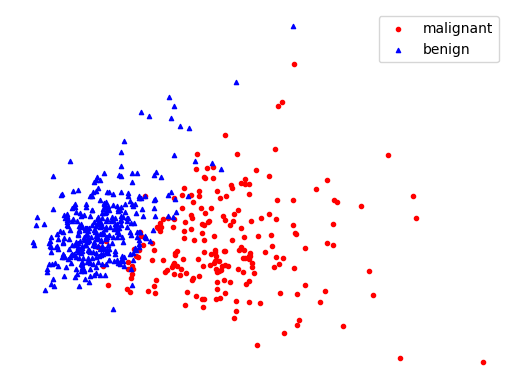

In [320]:
# visualize
plt.axis("off")
plt.scatter(transformed_X[cancer_data.target==0][:, 0], transformed_X[cancer_data.target==0][:, 1], s=9, label='malignant',
c='red')
plt.scatter(transformed_X[cancer_data.target==1][:, 0], transformed_X[cancer_data.target==1][:, 1], s=9, label='benign',
c='blue', marker="^")
plt.legend()
plt.show()

3. Classification using Logistic Regression

In [357]:
print(X_train.shape)
print(y_train.shape)

(398, 31)
(398,)


In [359]:
lorg = LogisticRegression(random_state=40, fit_intercept=False, max_iter=1000)
# train model by training set
lorg.fit(X_train, y_train)
lorg.coef_

array([[ 3.41340773e-01,  1.67326632e+00,  1.61486042e-01,
         3.10257112e-02, -6.94692041e-03, -1.04919260e-01,
        -2.90084261e-01, -4.88426925e-01, -2.65663572e-01,
        -1.47142404e-01, -1.19703716e-02,  4.62533656e-02,
         1.31397657e+00,  4.69793011e-01, -1.41288857e-01,
        -1.09068347e-02, -2.15541132e-02, -7.53334482e-02,
        -3.93407238e-02, -2.57309849e-02, -1.65882729e-03,
         1.59710245e+00, -3.96377457e-01, -2.19446706e-01,
        -1.80612650e-02, -1.88563326e-01, -8.31875528e-01,
        -1.37896846e+00, -5.33340786e-01, -4.45524180e-01,
        -8.17287037e-02]])

In [361]:
y_pred = lorg.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [362]:
print('accuracy =', accuracy_score(y_test, y_pred))
print('precision =', precision_score(y_test, y_pred))
print('recall =', recall_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = 0.9707602339181286
precision = 0.9813084112149533
recall = 0.9722222222222222
[[ 61   2]
 [  3 105]]


Kết quả cho thấy độ chính xác của mô hình Perceptron so với mô hình sử dụng Logistic Regression thấp hơn không nhiều:
- Accuracy thấp hơn (0.94 < 0.97)
- Precision thấp hơn (0.93 < 0.98)
- Recall cao hơn (0.98 > 0.97)

-> Tỷ lệ bỏ sót các mẫu positive (u lành tính) thấp, tuy nhiên còn lẫn một số trường hợp u ác tính được dự đoán là lành tính -> nguy hiểm hơn

-> Trong trường hợp này, nên lựa chọn mô hình có precision cao (chắc chắn chẩn đoán đúng u ác tính) để đảm bảo an toàn

-> Logistic Regression